<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [ ]:
import torch

In [ ]:
x = torch.randn(3, requires_grad = True)

In [ ]:
print(x)

tensor([-1.6216, -0.1012, -1.1285], requires_grad=True)


In [ ]:
y = x + 2
y.retain_grad()

In [ ]:
z = y * y*2
z.retain_grad()
z = z.mean()
print(z)

tensor(3.0056, grad_fn=<MeanBackward0>)


In [ ]:
z.backward(retain_graph=True)

In [ ]:
x,y, z

(tensor([-1.6216, -0.1012, -1.1285], requires_grad=True),
 tensor([0.3784, 1.8988, 0.8715], grad_fn=<AddBackward0>),
 tensor(3.0056, grad_fn=<MeanBackward0>))

In [ ]:
x.grad, y.grad

(tensor([0.5045, 2.5318, 1.1620]), tensor([0.5045, 2.5318, 1.1620]))

## For multiple z values

In [ ]:
import torch

In [ ]:
x = torch.randn(3, requires_grad = True)

In [ ]:
print(x)

tensor([ 0.1730,  1.0904, -0.4991], requires_grad=True)


In [ ]:
y = x + 2
y.retain_grad()

In [ ]:
z = y * y*2
z.retain_grad()
#z = z.mean()
print(z)

tensor([ 9.4438, 19.1016,  4.5051], grad_fn=<MulBackward0>)


In [ ]:
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v, retain_graph=True)

In [ ]:
x, y, z

(tensor([ 0.1730,  1.0904, -0.4991], requires_grad=True),
 tensor([2.1730, 3.0904, 1.5009], grad_fn=<AddBackward0>),
 tensor([ 9.4438, 19.1016,  4.5051], grad_fn=<MulBackward0>))

In [ ]:
x.grad, y.grad

(tensor([8.6920e-01, 1.2362e+01, 6.0034e-03]),
 tensor([8.6920e-01, 1.2362e+01, 6.0034e-03]))

## Stopping gradient descent

In [ ]:
x.requires_grad_(False)
print(x)

tensor([ 0.1730,  1.0904, -0.4991])


In [ ]:
y = x.detach()
print(y)

tensor([ 0.1730,  1.0904, -0.4991])


In [ ]:
with torch.no_grad():
    print(x)

tensor([ 0.1730,  1.0904, -0.4991])


## Zeroing Gradients

In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(5):
    model_output = (weights * 3).sum()

    model_output.backward()

    print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
tensor([12., 12., 12., 12.])
tensor([15., 15., 15., 15.])


In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(5):
    model_output = (weights * 3).sum()

    model_output.backward()

    print(weights.grad)

    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


## Backpropagation

In [ ]:
weights = torch.ones(4, requires_grad=True)

In [ ]:
pip list| grep nbdevAuto

nbdevAuto                 0.0.119        /home/ben/BENEDICT_Only/Benedict_Projects/Benedict_ML/nbdevAuto
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from graphviz import Digraph
from nbdevAuto import functions

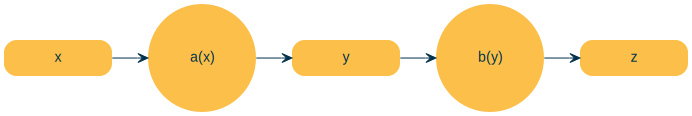

In [ ]:
dot = functions.graph()
# Add nodes with different shapes and formatting
dot.node('x', 'x')
dot.node('a', 'a(x)', shape='circle')
dot.node('y', 'y')
dot.node('b', 'b(y)', shape='circle')
dot.node('z', 'z')

# Add edges with custom labels and formatting
dot.edge('x', 'a')
dot.edge('a', 'y')
dot.edge('y', 'b')
dot.edge('b', 'z')

# Render the graph
dot

**Chain rule**

$\dfrac{\delta z}{\delta x} =  \dfrac{\delta z}{\delta y} \cdot \dfrac{\delta y}{\delta x}$

## Computational Graph

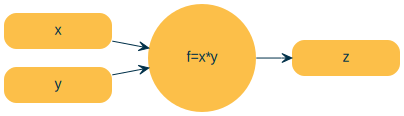

In [ ]:
dot = functions.graph()
# Add nodes with different shapes and formatting
dot.node('x', 'x')
dot.node('*', 'f=x*y', shape='circle')
dot.node('y', 'y')
dot.node('z', 'z')

# Add edges with custom labels and formatting
dot.edge('x', '*')
dot.edge('y', '*')
dot.edge('*', 'z')

# Render the graph
dot

$\dfrac{\delta z}{\delta x}  = \dfrac{\delta xy}{\delta x} = y$ 

$\dfrac{\delta z}{\delta y}  = \dfrac{\delta xy}{\delta y} = y$ 


$\dfrac{\delta  \ \text{loss}}{\delta x}  = \dfrac{\delta  \ \text{loss}}{\delta z}  \cdot \dfrac{\delta  z}{\delta x}  $ 

1. Forward pass: Computer loss
2. Compute local gradients
3. Backward pass: Compute dLoss/dWeights using the Chain Rule

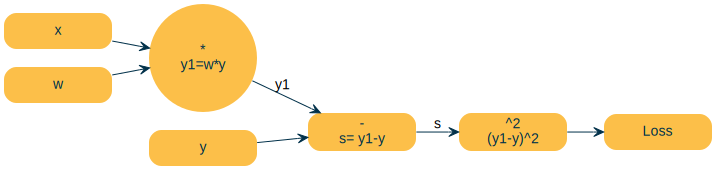

In [ ]:
dot = functions.graph()
# Add nodes with different shapes and formatting
dot.node('x', 'x')
dot.node('w', 'w')
dot.node('*', '*\ny1=w*y', shape='circle')

dot.node('y', 'y')
dot.node('-', '-\ns= y1-y')

dot.node('^2', '^2\n(y1-y)^2')
dot.node('Loss', 'Loss')
# Add edges with custom labels and formatting
dot.edge('x', '*')
dot.edge('w', '*')

dot.edge('*', '-', label='y1')
dot.edge('y', '-')

dot.edge('-', '^2', label='s')

dot.edge('^2', 'Loss')
# Render the graph
dot

$Loss = (\hat{y} - y)^2$ 

$\dfrac{\delta loss}{\delta s} = \dfrac{s^2}{s} = 2s$

$\dfrac{\delta s}{\delta \hat{y}} = \dfrac{\delta\hat{y} - y}{\delta \hat{y}} = 1$

$\dfrac{\delta \hat{y}}{\delta w} = \dfrac{\delta wx}{\delta w} = x$

$\therefore \dfrac{\delta loss}{\delta w} = \dfrac{\delta loss}{\delta s} \cdot \dfrac{\delta s}{\delta y} \cdot  \dfrac{\delta \hat{y}}{\delta w} = 2 \cdot s \cdot x = 2 \cdot (-1) \cdot (1) = -2$

In [ ]:
x = 1
y = 2
w = 1

y1 = x * w 
s = y1-y
loss = s**2

In [ ]:
print(f'x:{x} w:{w} y1:{y1} y:{y} s:{s} loss:{loss}')

x:1 w:1 y1:1 y:2 s:-1 loss:1


In [ ]:
import torch
x = torch.tensor(1.0)
y = torch.tensor(2.0)

In [ ]:
w = torch.tensor(1.0, requires_grad = True)

lr = 0.005

In [ ]:
#forward pass and compute the loss
y1 = w * x
loss = (y1-y)**2

print(y1)
print(loss)

tensor(1., grad_fn=<MulBackward0>)
tensor(1., grad_fn=<PowBackward0>)


In [ ]:
# backward pass

loss.backward()
print(w.grad)

w.grad.zero_()

tensor(-2.)


tensor(0.)

## Gradient Descent

### Numpy


> Prediction: Manually

> Gradients Computation: Manually

> Loss Computation: Manually

> Parameter updates: Manually

In [ ]:
import numpy as np

In [ ]:
x = np.array([1,2,3,4], dtype=np.float32)
y = np.array([2,4,6,8], dtype=np.float32)

w = 0.0

In [ ]:
# model
def forward(x):
    return w * x


def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

In [ ]:
# gradient

# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)

def gradient (x, y, y_predicted):
    return np.dot(2 * x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000


In [ ]:
learning_rate = 0.01
n_iters = 15

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)

    # loss 
    l = loss(y, y_pred)

    # gradients
    dw = gradient(x, y, y_pred)

    # update weights
    w -= learning_rate * dw

    if epoch % 1 == 0:
        print(f'epoc:{epoch}  w = {w:.3f} , y_pred={forward(5)}, y = {10}, loss = {l:.8f}, dw = {dw}')

print(f'Prediction after training: {forward(5):.3f}, y = {10}')

epoc:0  w = 1.200 , y_pred=6.0, y = 10, loss = 30.00000000, dw = -120.0
epoc:1  w = 1.680 , y_pred=8.399999809265136, y = 10, loss = 4.79999924, dw = -47.999996185302734
epoc:2  w = 1.872 , y_pred=9.35999994277954, y = 10, loss = 0.76800019, dw = -19.200002670288086
epoc:3  w = 1.949 , y_pred=9.743999934196472, y = 10, loss = 0.12288000, dw = -7.679999828338623
epoc:4  w = 1.980 , y_pred=9.897600066661834, y = 10, loss = 0.01966083, dw = -3.072002649307251
epoc:5  w = 1.992 , y_pred=9.95904014110565, y = 10, loss = 0.00314574, dw = -1.2288014888763428
epoc:6  w = 1.997 , y_pred=9.983615934848784, y = 10, loss = 0.00050331, dw = -0.4915158748626709
epoc:7  w = 1.999 , y_pred=9.993446409702301, y = 10, loss = 0.00008053, dw = -0.1966094970703125
epoc:8  w = 1.999 , y_pred=9.997378492355345, y = 10, loss = 0.00001288, dw = -0.07864165306091309
epoc:9  w = 2.000 , y_pred=9.998951268196105, y = 10, loss = 0.00000206, dw = -0.03145551681518555
epoc:10  w = 2.000 , y_pred=9.999580299854276, y

### Torch


> Prediction: Manually

> Gradients Computation: Autograd

> Loss Computation: Manually

> Parameter updates: Manually

In [ ]:
x = torch.tensor([1,2,3,4], dtype=torch.float32)
y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor([0.0], dtype=torch.float32, requires_grad=True)

In [ ]:
# model
def forward(x):
    return w * x


def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

In [ ]:
# gradient

# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)

print(f'Prediction before training: f(5) = {forward(5)}')

Prediction before training: f(5) = tensor([0.], grad_fn=<MulBackward0>)


In [ ]:
learning_rate = 0.01
n_iters = 50

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)

    # loss 
    l = loss(y, y_pred)

    # gradients
    l.backward()

    # update weights
    with torch.no_grad():
        w -= learning_rate * w.grad

    if epoch % 2 == 0:
        print(f'epoc:{epoch}  w = {w.item():.3f}, y_pred={forward(5).item():.3f}, y = {10}, loss = {l.item():.7f}, dw = {w.grad.item():.7f}')

    w.grad.zero_()

print(f'Prediction after training: {forward(5)}, y = {10}')

epoc:0  w = 0.300, y_pred=1.500, y = 10, loss = 30.0000000, dw = -30.0000000
epoc:2  w = 0.772, y_pred=3.859, y = 10, loss = 15.6601877, dw = -21.6749992
epoc:4  w = 1.113, y_pred=5.563, y = 10, loss = 8.1747169, dw = -15.6601877
epoc:6  w = 1.359, y_pred=6.794, y = 10, loss = 4.2672529, dw = -11.3144855
epoc:8  w = 1.537, y_pred=7.684, y = 10, loss = 2.2275321, dw = -8.1747150
epoc:10  w = 1.665, y_pred=8.327, y = 10, loss = 1.1627856, dw = -5.9062314
epoc:12  w = 1.758, y_pred=8.791, y = 10, loss = 0.6069812, dw = -4.2672515
epoc:14  w = 1.825, y_pred=9.126, y = 10, loss = 0.3168478, dw = -3.0830884
epoc:16  w = 1.874, y_pred=9.369, y = 10, loss = 0.1653965, dw = -2.2275314
epoc:18  w = 1.909, y_pred=9.544, y = 10, loss = 0.0863381, dw = -1.6093917
epoc:20  w = 1.934, y_pred=9.671, y = 10, loss = 0.0450689, dw = -1.1627841
epoc:22  w = 1.952, y_pred=9.762, y = 10, loss = 0.0235263, dw = -0.8401127
epoc:24  w = 1.966, y_pred=9.828, y = 10, loss = 0.0122808, dw = -0.6069803
epoc:26  w 

### Pytorch Loss and Pytorch Optimizer


> Prediction: Manually

> Gradients Computation: Autograd

> Loss Computation: Pytorch Loss

> Parameter updates: Pytorch Optimizer

1. Design Model = (input, output, size, forward pass)
2. Construct loss and optimizer
3. Training loop
   - forward pass: compute prediction
   - backward pass: gradients
   - update weights

In [ ]:
import torch
import torch.nn as nn

x = torch.tensor([1,2,3,4], dtype=torch.float32)
y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor([0.0], dtype=torch.float32, requires_grad=True)

In [ ]:
# model
def forward(x):
    return w * x

In [ ]:
print(f'Prediction before training: f(5) = {forward(5)}')

Prediction before training: f(5) = tensor([0.], grad_fn=<MulBackward0>)


In [ ]:
learning_rate = 0.01
n_iters = 50

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr= learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(x)

    # loss 
    l = loss(y, y_pred)

    # gradients
    l.backward()

    optimizer.step()


    if epoch % 2 == 0:
        print(f'epoc:{epoch}  w = {w.item():.3f}, y_pred={forward(5).item():.3f}, y = {10}, loss = {l.item():.7f}, dw = {w.grad.item():.7f}')

    optimizer.zero_grad()

print(f'Prediction after training: {forward(5)}, y = {10}')

epoc:0  w = 0.300, y_pred=1.500, y = 10, loss = 30.0000000, dw = -30.0000000
epoc:2  w = 0.772, y_pred=3.859, y = 10, loss = 15.6601877, dw = -21.6749992
epoc:4  w = 1.113, y_pred=5.563, y = 10, loss = 8.1747169, dw = -15.6601877
epoc:6  w = 1.359, y_pred=6.794, y = 10, loss = 4.2672529, dw = -11.3144855
epoc:8  w = 1.537, y_pred=7.684, y = 10, loss = 2.2275321, dw = -8.1747150
epoc:10  w = 1.665, y_pred=8.327, y = 10, loss = 1.1627856, dw = -5.9062314
epoc:12  w = 1.758, y_pred=8.791, y = 10, loss = 0.6069812, dw = -4.2672515
epoc:14  w = 1.825, y_pred=9.126, y = 10, loss = 0.3168478, dw = -3.0830884
epoc:16  w = 1.874, y_pred=9.369, y = 10, loss = 0.1653965, dw = -2.2275314
epoc:18  w = 1.909, y_pred=9.544, y = 10, loss = 0.0863381, dw = -1.6093917
epoc:20  w = 1.934, y_pred=9.671, y = 10, loss = 0.0450689, dw = -1.1627841
epoc:22  w = 1.952, y_pred=9.762, y = 10, loss = 0.0235263, dw = -0.8401127
epoc:24  w = 1.966, y_pred=9.828, y = 10, loss = 0.0122808, dw = -0.6069803
epoc:26  w 

### Pytorch Automate


> Prediction: Manually

> Gradients Computation: Autograd

> Loss Computation: Pytorch Loss

> Parameter updates: Pytorch Optimizer

In [ ]:
import torch
import torch.nn as nn

x = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

x_test = torch.tensor([5], dtype = torch.float32)
n_samples, n_features = x.shape
n_samples, n_features

(4, 1)

In [ ]:
model = nn.Linear(in_features = n_features, out_features = 1)
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
[w,b] = model.parameters()
w[0].item()

-0.9119284152984619

In [ ]:
model.state_dict()['weight']

tensor([[-0.9119]])

In [ ]:
print(f'Prediction before training: f(5) = {model(x_test)}')

Prediction before training: f(5) = tensor([-4.1126], grad_fn=<ViewBackward0>)


In [ ]:
learning_rate = 0.1
n_iters = 500

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(x)

    # loss 
    l = loss(y, y_pred)

    # gradients
    l.backward()

    optimizer.step()


    if epoch % 20 == 0:
        [w,b] = model.parameters()
        print(f'epoc:{epoch}  w = {w[0].item():.3f} {b[0].item():.3f}, y_pred={model(x_test).item():.3f}, y = {10}, loss = {l.item():.7f}, dw = {w.grad.item():.7f}')

    optimizer.zero_grad()

print(f'Prediction after training: {model(x_test)}, y = {10}')

epoc:0  w = 3.232 1.814, y_pred=17.976, y = 10, loss = 57.2857742, dw = -41.4436264
epoc:20  w = 1.769 0.681, y_pred=9.526, y = 10, loss = 0.0821977, dw = -0.0851871
epoc:40  w = 1.874 0.371, y_pred=9.740, y = 10, loss = 0.0243662, dw = -0.0389004
epoc:60  w = 1.931 0.202, y_pred=9.859, y = 10, loss = 0.0072235, dw = -0.0211780
epoc:80  w = 1.963 0.110, y_pred=9.923, y = 10, loss = 0.0021415, dw = -0.0115299
epoc:100  w = 1.980 0.060, y_pred=9.958, y = 10, loss = 0.0006349, dw = -0.0062776
epoc:120  w = 1.989 0.033, y_pred=9.977, y = 10, loss = 0.0001882, dw = -0.0034181
epoc:140  w = 1.994 0.018, y_pred=9.988, y = 10, loss = 0.0000558, dw = -0.0018613
epoc:160  w = 1.997 0.010, y_pred=9.993, y = 10, loss = 0.0000165, dw = -0.0010126
epoc:180  w = 1.998 0.005, y_pred=9.996, y = 10, loss = 0.0000049, dw = -0.0005509
epoc:200  w = 1.999 0.003, y_pred=9.998, y = 10, loss = 0.0000015, dw = -0.0003018
epoc:220  w = 1.999 0.002, y_pred=9.999, y = 10, loss = 0.0000004, dw = -0.0001646
epoc:24

### Pytorch Model


> Prediction: Manually

> Gradients Computation: Autograd

> Loss Computation: Pytorch Loss

> Parameter updates: Pytorch Optimizer

1. Design Model = (input, output, size, forward pass)
2. Construct loss and optimizer
3. Training loop
   - forward pass: compute prediction
   - backward pass: gradients
   - update weights

In [ ]:
import torch
import torch.nn as nn

x = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

x_test = torch.tensor([5], dtype = torch.float32)
n_samples, n_features = x.shape
n_samples, n_features

(4, 1)

In [ ]:
model = nn.Linear(in_features = n_features, out_features = 1)
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
class LinearRegression(nn.Module):
    def __init__(self, in_features, out_features):
        super(LinearRegression, self).__init__()

        self.lin = nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.lin(x)

model = LinearRegression(in_features = n_features, out_features = 1)
model

LinearRegression(
  (lin): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
[w,b] = model.parameters()
w[0].item()

0.014849305152893066

In [ ]:
model.state_dict()['lin.weight']

tensor([[0.0148]])

In [ ]:
print(f'Prediction before training: f(5) = {model(x_test)}')

Prediction before training: f(5) = tensor([0.8469], grad_fn=<ViewBackward0>)


In [ ]:
learning_rate = 0.1
n_iters = 500

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(x)

    # loss 
    l = loss(y, y_pred)

    # gradients
    l.backward()

    optimizer.step()


    if epoch % 20 == 0:
        [w,b] = model.parameters()
        print(f'epoc:{epoch}  w = {w[0].item():.3f} {b[0].item():.3f}, y_pred={model(x_test).item():.3f}, y = {10}, loss = {l.item():.7f}, dw = {w.grad.item():.7f}')

    optimizer.zero_grad()

print(f'Prediction after training: {model(x_test)}, y = {10}')

epoc:0  w = 2.606 1.611, y_pred=14.642, y = 10, loss = 22.4837551, dw = -25.9138470
epoc:20  w = 1.767 0.686, y_pred=9.522, y = 10, loss = 0.0833880, dw = -0.0805315
epoc:40  w = 1.873 0.373, y_pred=9.739, y = 10, loss = 0.0247202, dw = -0.0391794
epoc:60  w = 1.931 0.203, y_pred=9.858, y = 10, loss = 0.0073285, dw = -0.0213290
epoc:80  w = 1.962 0.111, y_pred=9.922, y = 10, loss = 0.0021726, dw = -0.0116135
epoc:100  w = 1.980 0.060, y_pred=9.958, y = 10, loss = 0.0006441, dw = -0.0063227
epoc:120  w = 1.989 0.033, y_pred=9.977, y = 10, loss = 0.0001909, dw = -0.0034429
epoc:140  w = 1.994 0.018, y_pred=9.987, y = 10, loss = 0.0000566, dw = -0.0018725
epoc:160  w = 1.997 0.010, y_pred=9.993, y = 10, loss = 0.0000168, dw = -0.0010188
epoc:180  w = 1.998 0.005, y_pred=9.996, y = 10, loss = 0.0000050, dw = -0.0005555
epoc:200  w = 1.999 0.003, y_pred=9.998, y = 10, loss = 0.0000015, dw = -0.0003012
epoc:220  w = 1.999 0.002, y_pred=9.999, y = 10, loss = 0.0000004, dw = -0.0001644
epoc:24

## Linear Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

1. Prepare data
2. model
3. loss and optimizer
4. training loop

In [ ]:
x_numpy, y_numpy = datasets.make_regression(n_samples= 100, n_features=1, noise = 20, random_state = 1)

In [ ]:
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
x[:5], y[:5]

(tensor([[-0.6118],
         [-0.2494],
         [ 0.4885],
         [ 0.7620],
         [ 1.5198]]),
 tensor([-55.5386, -10.6620,  22.7574, 101.0961, 144.3376]))

In [ ]:
x_test = x[4]
y_test = y[4]
x_test, y_test

(tensor([1.5198]), tensor(144.3376))

In [ ]:
y =y.view(y.shape[0], 1)
x[:5], y[:5]

(tensor([[-0.6118],
         [-0.2494],
         [ 0.4885],
         [ 0.7620],
         [ 1.5198]]),
 tensor([[-55.5386],
         [-10.6620],
         [ 22.7574],
         [101.0961],
         [144.3376]]))

In [ ]:
n_samples, n_features = x.shape
n_samples, n_features

(100, 1)

In [ ]:
#1.model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)
model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
[a,b] = model.parameters()
a,b

(Parameter containing:
 tensor([[-0.4086]], requires_grad=True),
 Parameter containing:
 tensor([0.7387], requires_grad=True))

In [ ]:
#2. loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

In [ ]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
#3. training loop
num_epochs = 1000

for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(x)
    loss=criterion(y_predicted, y)

    # backward pass
    loss.backward()

    #update
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        [w,b] = model.parameters()
        print(f'[epoc:{epoch}] (y = {w[0].item():.3f}x + {b[0].item():.3f}) y_pred:{model(x_test).item():.3f}, y:{y_test}, loss :{loss.item():.7f}, dw:{w.grad.item():.7f} db:{b.grad.item():.7f}')

    optimizer.zero_grad()

[epoc:49] (y = 74.751x + 4.940) y_pred:118.547, y:144.33755493164062, loss :381.1035156, dw:-12.2604523 db:0.8364363
[epoc:99] (y = 78.958x + 4.571) y_pred:124.573, y:144.33755493164062, loss :342.7143860, dw:-5.5758629 db:0.6129383
[epoc:149] (y = 80.874x + 4.331) y_pred:127.245, y:144.33755493164062, loss :334.6977844, dw:-2.5416768 db:0.3636089
[epoc:199] (y = 81.748x + 4.196) y_pred:128.437, y:144.33755493164062, loss :333.0159302, dw:-1.1606977 db:0.1964752
[epoc:249] (y = 82.147x + 4.124) y_pred:128.973, y:144.33755493164062, loss :332.6621094, dw:-0.5308060 db:0.1008240
[epoc:299] (y = 82.330x + 4.088) y_pred:129.214, y:144.33755493164062, loss :332.5874939, dw:-0.2430411 db:0.0501155
[epoc:349] (y = 82.414x + 4.070) y_pred:129.324, y:144.33755493164062, loss :332.5718079, dw:-0.1113836 db:0.0243861
[epoc:399] (y = 82.452x + 4.062) y_pred:129.374, y:144.33755493164062, loss :332.5684509, dw:-0.0510854 db:0.0116911
[epoc:449] (y = 82.470x + 4.058) y_pred:129.396, y:144.3375549316

In [ ]:
predicted = model(x).detach().numpy()

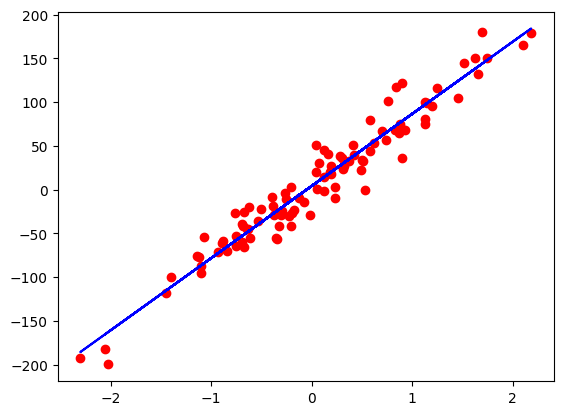

In [ ]:
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()

In [ ]:
from bokeh.io import output_notebook

In [ ]:
output_notebook()

Loading BokehJS ...

In [ ]:
from bokeh.plotting import figure, show

from bokeh.io import curdoc
# apply theme to current document
curdoc().theme = "dark_minimal"


# create a new plot with a title and axis labels
p = figure(title="Real data vs Model",
           x_axis_label='x',
           y_axis_label='y',
           sizing_mode="stretch_width",
           max_width=1000,
           height=500,)


# add a line renderer with legend and line thickness to the plot
p.circle(x_numpy.flatten(), y_numpy.flatten(), legend_label="Original", line_width=2, color="red", radius=0.02)
p.line(x_numpy.flatten(), predicted.flatten(), legend_label="Predicted", line_width=2)

p.legend.location = "top_left"
p.legend.click_policy="mute"

# show the results
show(p)

## Logistic Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
bc = datasets.load_breast_cancer()
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
x, y = bc.data, bc.target
n_samples, n_features = x.shape
n_samples, n_features

(569, 30)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [ ]:
y_train = y_train.view(y_train.shape[0], 1)

In [ ]:
#1. model

class LogisticRegression(nn.Module):
    def __init__(self, n_input):
        super(LogisticRegression, self).__init__()

        self.linear = nn.Linear(n_input, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))

        return y_pred

model = LogisticRegression(n_features)

In [ ]:
#2. loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
#3. train loop
num_epochs = 1000
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(x_train)
    loss=criterion(y_predicted, y_train)

    # backward pass
    loss.backward()

    #update
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        with torch.no_grad():
            [w,b] = model.parameters()
            y_predicted = model(x_test)
            y_predicted_cls = y_predicted.round().flatten()
            acc = (y_predicted_cls == y_test).float().mean() * 100
            error = (100 - acc)
            print(f'[epoc:{epoch + 1}] (y = {w.mean().item():.3f}x + {b.mean().item():.3f}) \
            loss:{loss.item():.5f}, accuracy: {acc:.2f}%, error: {error:.2f}%, \
            dw:{w.grad.mean().item():.5f} db:{b.grad.mean().item():.5f}')

    optimizer.zero_grad()

[epoc:50] (y = -0.161x + 0.417)             loss:0.11979, accuracy: 92.11%, error: 7.89%,             dw:0.01399 db:-0.02377
[epoc:100] (y = -0.211x + 0.575)             loss:0.08388, accuracy: 92.98%, error: 7.02%,             dw:0.00694 db:-0.00972
[epoc:150] (y = -0.245x + 0.668)             loss:0.06873, accuracy: 94.74%, error: 5.26%,             dw:0.00463 db:-0.00550
[epoc:200] (y = -0.273x + 0.732)             loss:0.05965, accuracy: 95.61%, error: 4.39%,             dw:0.00345 db:-0.00349
[epoc:250] (y = -0.298x + 0.780)             loss:0.05347, accuracy: 95.61%, error: 4.39%,             dw:0.00273 db:-0.00234
[epoc:300] (y = -0.320x + 0.817)             loss:0.04894, accuracy: 95.61%, error: 4.39%,             dw:0.00224 db:-0.00163
[epoc:350] (y = -0.341x + 0.845)             loss:0.04546, accuracy: 95.61%, error: 4.39%,             dw:0.00189 db:-0.00116
[epoc:400] (y = -0.360x + 0.867)             loss:0.04269, accuracy: 95.61%, error: 4.39%,             dw:0.00163 db:-0

In [ ]:
with torch.no_grad():
    [w,b] = model.parameters()
    y_predicted = model(x_test)
    y_predicted_cls = y_predicted.round().flatten()
    acc = (y_predicted_cls == y_test).float().mean() * 100
    error = (100 - acc)
    print(f'[epoc:{epoch + 1}] (y = {w.mean().item():.3f}x + {b.mean().item():.3f}) \
    loss:{loss.item():.5f}, accuracy: {acc:.2f}%, error: {error:.2f}%')

[epoc:1000] (y = -0.219x + 0.270)     loss:0.08642, accuracy: 94.74%, error: 5.26%


## Dataset and Dataloaders

`Epoch`: 1 forward and backward pass of **ALL** training samples

`Batchsize`: No. of training samples in one forward and backward pass

`No. of iterations`: number of passes, each pass using [batchsize] number of samples

e.g 100 samples, batch_size = 20 --> 100/20 = 5 iterations for 1 epoch

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self):
        #data loading
        xy = np.loadtxt('Data/wine.csv', delimiter=",", dtype=np.float32, skiprows = 1)
        self.xy = xy
        self.x = torch.from_numpy(xy[:,1:])
        self.y = torch.from_numpy(xy[:,[0]])
        self.n_samples = xy.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.n_samples

In [ ]:
dataset = WineDataset()

In [ ]:
first_data = dataset[0]
first_data

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03]),
 tensor([1.]))

In [ ]:
features, labels = dataset[0]
features, labels

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03]),
 tensor([1.]))

In [ ]:
dataloader = DataLoader(dataset=dataset, batch_size = 4, shuffle = True, num_workers = 2)

In [ ]:
dataiter = iter(dataloader)

In [ ]:
next(dataiter)

[tensor([[1.3680e+01, 1.8300e+00, 2.3600e+00, 1.7200e+01, 1.0400e+02, 2.4200e+00,
          2.6900e+00, 4.2000e-01, 1.9700e+00, 3.8400e+00, 1.2300e+00, 2.8700e+00,
          9.9000e+02],
         [1.2160e+01, 1.6100e+00, 2.3100e+00, 2.2800e+01, 9.0000e+01, 1.7800e+00,
          1.6900e+00, 4.3000e-01, 1.5600e+00, 2.4500e+00, 1.3300e+00, 2.2600e+00,
          4.9500e+02],
         [1.2510e+01, 1.7300e+00, 1.9800e+00, 2.0500e+01, 8.5000e+01, 2.2000e+00,
          1.9200e+00, 3.2000e-01, 1.4800e+00, 2.9400e+00, 1.0400e+00, 3.5700e+00,
          6.7200e+02],
         [1.4200e+01, 1.7600e+00, 2.4500e+00, 1.5200e+01, 1.1200e+02, 3.2700e+00,
          3.3900e+00, 3.4000e-01, 1.9700e+00, 6.7500e+00, 1.0500e+00, 2.8500e+00,
          1.4500e+03]]),
 tensor([[1.],
         [2.],
         [2.],
         [1.]])]

In [ ]:
dataiter = iter(dataloader)

In [ ]:
data = next(dataiter)
features, labels = data

In [ ]:
features, labels

(tensor([[1.2790e+01, 2.6700e+00, 2.4800e+00, 2.2000e+01, 1.1200e+02, 1.4800e+00,
          1.3600e+00, 2.4000e-01, 1.2600e+00, 1.0800e+01, 4.8000e-01, 1.4700e+00,
          4.8000e+02],
         [1.2720e+01, 1.7500e+00, 2.2800e+00, 2.2500e+01, 8.4000e+01, 1.3800e+00,
          1.7600e+00, 4.8000e-01, 1.6300e+00, 3.3000e+00, 8.8000e-01, 2.4200e+00,
          4.8800e+02],
         [1.4380e+01, 1.8700e+00, 2.3800e+00, 1.2000e+01, 1.0200e+02, 3.3000e+00,
          3.6400e+00, 2.9000e-01, 2.9600e+00, 7.5000e+00, 1.2000e+00, 3.0000e+00,
          1.5470e+03],
         [1.1650e+01, 1.6700e+00, 2.6200e+00, 2.6000e+01, 8.8000e+01, 1.9200e+00,
          1.6100e+00, 4.0000e-01, 1.3400e+00, 2.6000e+00, 1.3600e+00, 3.2100e+00,
          5.6200e+02]]),
 tensor([[3.],
         [2.],
         [1.],
         [2.]]))

In [ ]:
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)

total_samples, n_iterations

(178, 45)

In [ ]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        if (i + 1) % 5 == 0:
            print(f'epoch {epoch + 1}/{num_epochs}, step {i+1}/{n_iterations}, inputs:{inputs[0][:5]} labels:{labels[0]}')

epoch 1/2, step 5/45, inputs:tensor([ 11.8100,   2.1200,   2.7400,  21.5000, 134.0000]) labels:tensor([2.])
epoch 1/2, step 10/45, inputs:tensor([ 13.2400,   2.5900,   2.8700,  21.0000, 118.0000]) labels:tensor([1.])
epoch 1/2, step 15/45, inputs:tensor([13.4800,  1.6700,  2.6400, 22.5000, 89.0000]) labels:tensor([3.])
epoch 1/2, step 20/45, inputs:tensor([ 12.2900,   1.6100,   2.2100,  20.4000, 103.0000]) labels:tensor([2.])
epoch 1/2, step 25/45, inputs:tensor([ 13.5600,   1.7300,   2.4600,  20.5000, 116.0000]) labels:tensor([1.])
epoch 1/2, step 30/45, inputs:tensor([13.5000,  1.8100,  2.6100, 20.0000, 96.0000]) labels:tensor([1.])
epoch 1/2, step 35/45, inputs:tensor([14.0200,  1.6800,  2.2100, 16.0000, 96.0000]) labels:tensor([1.])
epoch 1/2, step 40/45, inputs:tensor([ 13.7700,   1.9000,   2.6800,  17.1000, 115.0000]) labels:tensor([1.])
epoch 1/2, step 45/45, inputs:tensor([12.4500,  3.0300,  2.6400, 27.0000, 97.0000]) labels:tensor([3.])
epoch 2/2, step 5/45, inputs:tensor([14.

## MNIST

In [ ]:
# Import dependencies
import torch 
from PIL import Image
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import DataLoader
import torchvision 

# Get data 
train = torchvision.datasets.MNIST(root="data", download=True, train=True, transform=torchvision.transforms.ToTensor())
dataset = DataLoader(train, 32)
#1,28,28 - classes 0-9

## Dataset Transform

### Types of Transform:

#### On Images:
> CenterCrop, Grayscale, Pad, RandomAffine RandomCrop, RandomHorizontalFlip, RandomRotation Resize, Scale

#### On Tensors:
> LinearTransformation, Normalize, RandomErasing

#### Conversion:
> ToPILImage: from tensor or ndarray

> ToTensor: from numpy.ndarray or PIL Image

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
    def __init__(self, transform = None):
        #data loading
        xy = np.loadtxt('Data/wine.csv', delimiter=",", dtype=np.float32, skiprows = 1)
        self.xy = xy
        self.x = xy[:,1:]
        self.y = xy[:,[0]]
        self.n_samples = xy.shape[0]
        self.transform = transform

    def __getitem__(self, index):
        sample = self.x[index], self.y[index]

        if self.transform:
            sample = self.transform(sample)

        return sample

    def __len__(self):
        return self.n_samples

In [ ]:
class ToTensor():
    def __call__(self, sample):
        inputs, targets  = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, target = sample
        inputs *= self.factor
        return inputs, target

In [ ]:
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])

In [ ]:
dataset = WineDataset(transform = composed)

In [ ]:
first_data = dataset[0]
first_data

(tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
         6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
         2.1300e+03]),
 tensor([1.]))

In [ ]:
features, labels = dataset[0]
features, labels

(tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
         1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
         4.2600e+03]),
 tensor([1.]))

In [ ]:
dataloader = DataLoader(dataset=dataset, batch_size = 4, shuffle = True, num_workers = 2)

In [ ]:
dataiter = iter(dataloader)

In [ ]:
next(dataiter)

[tensor([[2.4400e+01, 6.0600e+00, 4.6400e+00, 3.8000e+01, 1.9200e+02, 2.5000e+00,
          9.8000e-01, 8.0000e-01, 1.4600e+00, 1.1000e+01, 1.3200e+00, 3.6600e+00,
          1.0200e+03],
         [2.5620e+01, 4.6200e+00, 4.8000e+00, 4.8000e+01, 1.9600e+02, 2.3000e+00,
          2.1800e+00, 5.4000e-01, 1.6600e+00, 1.1400e+01, 1.3200e+00, 2.7200e+00,
          1.1200e+03],
         [1.1384e+02, 1.3680e+01, 1.9440e+01, 1.2480e+02, 1.0160e+03, 2.2400e+01,
          2.4480e+01, 2.2400e+00, 1.8320e+01, 4.5120e+01, 8.3200e+00, 3.1360e+01,
          8.5200e+03],
         [2.5920e+01, 6.9000e+00, 4.7000e+00, 3.7000e+01, 2.1200e+02, 2.7800e+00,
          1.4000e+00, 8.0000e-01, 1.8800e+00, 1.0560e+01, 1.3600e+00, 3.5000e+00,
          1.3500e+03]]),
 tensor([[3.],
         [3.],
         [1.],
         [3.]])]

In [ ]:
dataiter = iter(dataloader)

In [ ]:
data = next(dataiter)
features, labels = data

In [ ]:
features, labels

(tensor([[2.7720e+01, 2.7000e+00, 4.5400e+00, 3.2000e+01, 1.9600e+02, 5.9600e+00,
          6.3000e+00, 4.4000e-01, 3.7000e+00, 1.4440e+01, 2.0200e+00, 7.1000e+00,
          2.0900e+03],
         [2.7420e+01, 3.7200e+00, 4.7200e+00, 3.3200e+01, 2.0200e+02, 5.2200e+00,
          5.7600e+00, 5.4000e-01, 3.3800e+00, 7.6000e+00, 2.2200e+00, 8.0000e+00,
          2.0700e+03],
         [2.5680e+01, 5.9200e+00, 5.2200e+00, 4.8000e+01, 2.0200e+02, 4.6400e+00,
          1.2000e+00, 1.0600e+00, 1.6200e+00, 9.8400e+00, 1.7800e+00, 4.3000e+00,
          1.1800e+03],
         [2.6980e+01, 3.3200e+00, 4.4800e+00, 4.8000e+01, 1.7400e+02, 3.7600e+00,
          3.6800e+00, 5.4000e-01, 2.0600e+00, 7.4800e+00, 1.9600e+00, 5.5600e+00,
          9.4400e+02]]),
 tensor([[1.],
         [1.],
         [3.],
         [2.]]))

In [ ]:
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)

total_samples, n_iterations

(178, 45)

In [ ]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        if (i + 1) % 5 == 0:
            print(f'epoch {epoch + 1}/{num_epochs}, step {i+1}/{n_iterations}, inputs:{inputs[0][:5]} labels:{labels[0]}')

epoch 1/2, step 5/45, inputs:tensor([ 25.6800,   5.9200,   5.2200,  48.0000, 202.0000]) labels:tensor([3.])
epoch 1/2, step 10/45, inputs:tensor([ 26.9600,   3.3400,   5.2800,  45.0000, 178.0000]) labels:tensor([3.])
epoch 1/2, step 15/45, inputs:tensor([ 28.0400,   3.3600,   4.4200,  32.0000, 192.0000]) labels:tensor([1.])
epoch 1/2, step 20/45, inputs:tensor([ 23.6800,   5.7800,   4.4600,  36.0000, 224.0000]) labels:tensor([2.])
epoch 1/2, step 25/45, inputs:tensor([ 28.2000,   4.0400,   4.8000,  37.6000, 206.0000]) labels:tensor([1.])
epoch 1/2, step 30/45, inputs:tensor([ 24.8400,   5.1000,   4.5400,  44.0000, 180.0000]) labels:tensor([2.])
epoch 1/2, step 35/45, inputs:tensor([ 27.4800,   3.3400,   4.5000,  32.8000, 236.0000]) labels:tensor([1.])
epoch 1/2, step 40/45, inputs:tensor([ 27.3600,   3.6600,   4.7200,  34.4000, 208.0000]) labels:tensor([1.])
epoch 1/2, step 45/45, inputs:tensor([ 26.9600,   3.6200,   4.8200,  41.0000, 200.0000]) labels:tensor([1.])
epoch 2/2, step 5/45

## Softmax and Cross-Entropy

### Softmax
> $S(y_i) = \frac{e^{y_i}}{\sum e^{y_i}}$

$Linear = [2.0, 1.0, 0.1]$

$Softmax = [0.7, 0.2, 0.1]$


**Adds to 1**

In [ ]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis = 0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
outputs

array([0.65900114, 0.24243297, 0.09856589])

In [ ]:
x = torch.from_numpy(x)
x

tensor([2.0000, 1.0000, 0.1000], dtype=torch.float64)

In [ ]:
outputs = torch.softmax(x, dim = 0)
outputs

tensor([0.6590, 0.2424, 0.0986], dtype=torch.float64)

## Cross Entropy

> $D(\hat{Y}, Y) = \dfrac{1}{N} \cdot \displaystyle\sum_{i=1}^{N} Y_i \cdot \log{\hat{Y_i}}$

$Y = [1, 0, 0]$

$\hat{Y} = [0.7, 0.2, 0.1]  --> D(\hat{Y}, Y) = 0.35$

$Y = [1, 0, 0]$

$\hat{Y} = [0.7, 0.2, 0.1]  --> D(\hat{Y}, Y) = 2.30$

In [ ]:
def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss

In [ ]:
Y_actual = np.array([1,0,0])

Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])

l1 = cross_entropy(Y_actual, Y_pred_good)
l2 = cross_entropy(Y_actual, Y_pred_bad)

In [ ]:
print(f'good pred:{l1:4f}, bad pred:{l2:.4f}')

good pred:0.356675, bad pred:2.3026


### nn.CrossEntropyLoss()

> applies nn.LogSoftmax + nn.NLLLoss(negative log likelihood loss)

> y has class labels, not One-Hot!

> Y_pred has raw scores(logits), no softmax

In [ ]:
loss = nn.CrossEntropyLoss()

In [ ]:
Y = torch.tensor([0])

Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'good pred:{l1:4f}, bad pred:{l2:.4f}')

good pred:0.417030, bad pred:1.8406


In [ ]:
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(f'good pred:{predictions1}, bad pred:{predictions2}')

good pred:tensor([0]), bad pred:tensor([1])


In [ ]:
#Multiclass Problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.rely = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)

        return out

In [ ]:
model = NeuralNet2(input_size = 28 * 28, hidden_size = 5, num_classes = 3)
crioterion = nn.CrossEntropyLoss()

## Activation Functions

> Without activation functions, our network is basically just a stacked linear regression model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#Option 1 (create nn modules)
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        self.sigmoid = nn.Sigmoid()
        

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)

        return out

In [ ]:
#Option 2 (use activation functions directly in forward pass)
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, num_classes)
        

    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))

        return out

## MLP on MNIST

- MNIST
- DataLoader, Transformation
- Multilayer Neural Net, activation function
- Loss and Optimizer
- Training Loop (batch training)
- Model evaluation
- GPU Support

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms 
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
input_size = 28 * 28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100

In [ ]:
train_dataset = torchvision.datasets.MNIST(root="./data",
                                           download=True,
                                           train=True,
                                           transform=transforms.ToTensor())

test_dataset = torchvision.datasets.MNIST(root="./data",
                                          download=True,
                                          train=False,
                                          transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = batch_size,
                                          shuffle = False)

In [ ]:
len(train_dataset), len(test_dataset)

(60000, 10000)

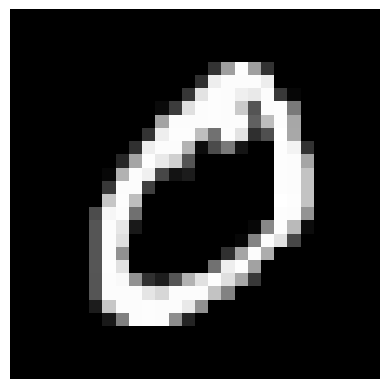

In [ ]:
image, label = train_dataset[1]
plt.imshow(transforms.ToPILImage()(image), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
examples = iter(train_loader)
images, labels = next(examples)

In [ ]:
images.shape, labels.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

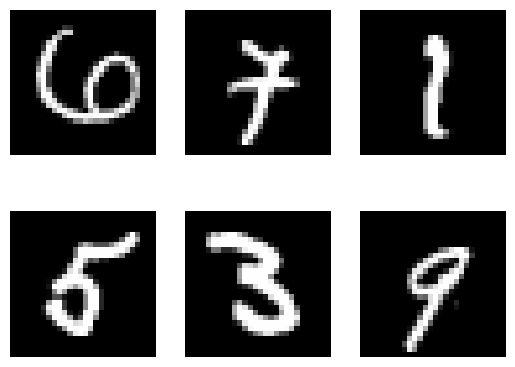

In [ ]:
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i][0], cmap = 'gray')
    plt.axis('off')

plt.show()

In [ ]:
# model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [ ]:
# loss and optimizer
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
# Train loop
n_total_steps = len(train_loader)
running_loss = 0.0
print_stat = 100

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28 --> 100 , 28 * 28
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % print_stat == 0:
            with torch.no_grad():
                n_correct = 0
                n_samples = 0
                for images, labels in test_loader:
                    images = images.reshape(-1, 28 * 28).to(device)
                    labels = labels.to(device)
                    outputs = model(images)

                    _, predictions = torch.max(outputs, 1)
                    n_samples += labels.shape[0]
                    n_correct += (predictions == labels).sum().item()
            
                acc = 100.0 * n_correct / n_samples
            
            print(f'[epoch:{epoch+1}/{num_epochs}, [step:{i+1}/{n_total_steps}] loss:{(running_loss/print_stat):.4f} accuracy:{acc}')
            running_loss = 0.0

[epoch:1/2, [step:100/600] loss:0.1501 accuracy:95.75166666666667
[epoch:1/2, [step:200/600] loss:0.1416 accuracy:95.87833333333333
[epoch:1/2, [step:300/600] loss:0.1484 accuracy:96.32
[epoch:1/2, [step:400/600] loss:0.1528 accuracy:96.335
[epoch:1/2, [step:500/600] loss:0.1360 accuracy:96.65166666666667
[epoch:1/2, [step:600/600] loss:0.1210 accuracy:96.815
[epoch:2/2, [step:100/600] loss:0.1129 accuracy:96.69333333333333
[epoch:2/2, [step:200/600] loss:0.1101 accuracy:97.1
[epoch:2/2, [step:300/600] loss:0.1209 accuracy:97.175
[epoch:2/2, [step:400/600] loss:0.1051 accuracy:97.15833333333333
[epoch:2/2, [step:500/600] loss:0.1082 accuracy:97.27666666666667
[epoch:2/2, [step:600/600] loss:0.1099 accuracy:97.445


In [ ]:
# Test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        #value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

accuracy = 95.76


## CNN on Cifar-10

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms 
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
num_epochs = 4
batch_size = 100

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root="./data", 
                                             download=True,
                                             train=True,
                                             transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root="./data",
                                            download=True,
                                            train=False,
                                            transform=transform)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = batch_size,
                                          shuffle = False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
len(train_dataset), len(test_dataset)

(50000, 10000)

In [ ]:
classes = train_dataset.class_to_idx

In [ ]:
classes = list(train_dataset.class_to_idx)

In [ ]:
list(classes)

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
examples = iter(train_loader)
images, labels = next(examples)

In [ ]:
images.shape, labels.shape

(torch.Size([100, 3, 32, 32]), torch.Size([100]))

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # input size: 3 colour channels
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 40)
        self.fc3 = nn.Linear(40, 10)
        

    def forward(self, x):
        out = self.pool(F.relu(self.conv1(x)))
        out = self.pool(F.relu(self.conv2(out)))
        out = out.view(-1, 16*5*5)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)

        return out
        

model = ConvNet().to(device)

In [ ]:
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
# Image Classifier Neural Network
class ImageClassifier(nn.Module): 
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, (3,3)), 
            nn.ReLU(),
            nn.Conv2d(32, 64, (3,3)), 
            nn.ReLU(),
            nn.Conv2d(64, 64, (3,3)), 
            nn.ReLU(),
            nn.Flatten(), 
            nn.Linear(64*(28-2)*(28-2), 10)  
        )

    def forward(self, x): 
        return self.model(x)

model = ImageClassifier().to(device)

In [ ]:
# Train loop
n_total_steps = len(train_loader)
running_loss = 0.0
print_stat = 100

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28 --> 100 , 28 * 28
        images = images.to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % print_stat == 0:
            with torch.no_grad():
                n_correct = 0
                n_samples = 0
                for images, labels in test_loader:
                    images = images.to(device)
                    labels = labels.to(device)
                    outputs = model(images)

                    _, predictions = torch.max(outputs, 1)
                    n_samples += labels.shape[0]
                    n_correct += (predictions == labels).sum().item()

                acc = 100.0 * n_correct / n_samples
            
            print(f'[epoch:{epoch+1}/{num_epochs}, [step:{i+1}/{n_total_steps}] loss:{(running_loss/print_stat):.4f} accuracy:{acc}')
            running_loss = 0.0

[epoch:1/4, [step:100/500] loss:2.3026 accuracy:11.686
[epoch:1/4, [step:200/500] loss:2.3022 accuracy:11.686
[epoch:1/4, [step:300/500] loss:2.3026 accuracy:11.686
[epoch:1/4, [step:400/500] loss:2.3025 accuracy:11.686
[epoch:1/4, [step:500/500] loss:2.3024 accuracy:11.686
[epoch:2/4, [step:100/500] loss:2.3026 accuracy:11.686
[epoch:2/4, [step:200/500] loss:2.3024 accuracy:11.686
[epoch:2/4, [step:300/500] loss:2.3024 accuracy:11.686
[epoch:2/4, [step:400/500] loss:2.3022 accuracy:11.686
[epoch:2/4, [step:500/500] loss:2.3027 accuracy:11.686
[epoch:3/4, [step:100/500] loss:2.3023 accuracy:11.686
[epoch:3/4, [step:200/500] loss:2.3022 accuracy:11.686
[epoch:3/4, [step:300/500] loss:2.3026 accuracy:11.686
[epoch:3/4, [step:400/500] loss:2.3026 accuracy:11.686
[epoch:3/4, [step:500/500] loss:2.3025 accuracy:11.686
[epoch:4/4, [step:100/500] loss:2.3025 accuracy:11.686
[epoch:4/4, [step:200/500] loss:2.3025 accuracy:11.686
[epoch:4/4, [step:300/500] loss:2.3024 accuracy:11.686
[epoch:4/4

In [ ]:
# Train loop
n_total_steps = len(train_loader)
running_loss = 0.0
print_stat = 100

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % print_stat == 0:
            with torch.no_grad():
                n_correct = 0
                n_samples = 0
                for images, labels in test_loader:
                    images = images.to(device)
                    labels = labels.to(device)
                    outputs = model(images)

                    _, predictions = torch.max(outputs, 1)
                    n_samples += labels.shape[0]
                    n_correct += (predictions == labels).sum().item()

                acc = 100.0 * n_correct / n_samples
            
            print(f'[epoch:{epoch+1}/{num_epochs}, [step:{i+1}/{n_total_steps}] loss:{(running_loss/print_stat):.4f} accuracy:{acc}')
            running_loss = 0.0

[epoch:1/4, [step:100/500] loss:2.3058 accuracy:9.184
[epoch:1/4, [step:200/500] loss:2.3051 accuracy:9.29
[epoch:1/4, [step:300/500] loss:2.3052 accuracy:9.316
[epoch:1/4, [step:400/500] loss:2.3056 accuracy:9.418
[epoch:1/4, [step:500/500] loss:2.3055 accuracy:9.474
[epoch:2/4, [step:100/500] loss:2.3042 accuracy:9.59
[epoch:2/4, [step:200/500] loss:2.3041 accuracy:9.636
[epoch:2/4, [step:300/500] loss:2.3038 accuracy:9.642
[epoch:2/4, [step:400/500] loss:2.3041 accuracy:9.686
[epoch:2/4, [step:500/500] loss:2.3041 accuracy:9.83
[epoch:3/4, [step:100/500] loss:2.3031 accuracy:9.836
[epoch:3/4, [step:200/500] loss:2.3028 accuracy:9.938
[epoch:3/4, [step:300/500] loss:2.3013 accuracy:9.99
[epoch:3/4, [step:400/500] loss:2.3030 accuracy:10.022
[epoch:3/4, [step:500/500] loss:2.3034 accuracy:10.088
[epoch:4/4, [step:100/500] loss:2.3020 accuracy:10.126
[epoch:4/4, [step:200/500] loss:2.3015 accuracy:10.196
[epoch:4/4, [step:300/500] loss:2.3013 accuracy:10.258
[epoch:4/4, [step:400/500] 